In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
_df = pd.read_json('news_data.json', lines = True)
df = _df.drop(_df.columns[[0,4,5]], axis = 1)

In [3]:
df

,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...
...,...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr..."
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...


In [4]:
target_category = df['category'].unique()
print(target_category)

['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']


In [5]:
df['category'] = df['category'].astype('string')
df['headline'] = df['headline'].astype('string')
df['short_description'] = df['short_description'].astype('string')

In [6]:
# category = df[['category', 'categoryId']].drop_duplicates().sort_values('categoryId')
# category.head()

In [7]:
df['category'].iloc[0:5]
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

In [8]:
df['headline'] = df['headline'].str.lower()
df['category'] = df['category'].str.lower()
df['short_description'] = df['short_description'].str.lower()

# df['category'] = df['category'].str.split(',') 
# df


In [9]:
# df['categoryId'] = df['category'].factorize()[0]
# df.head()
df

,headline,category,short_description
0,over 4 million americans roll up sleeves for o...,u.s. news,health experts said it is too early to predict...
1,"american airlines flyer charged, banned for li...",u.s. news,he was subdued by passengers and crew when he ...
2,23 of the funniest tweets about cats and dogs ...,comedy,"""until you have a dog you don't understand wha..."
3,the funniest tweets from parents this week (se...,parenting,"""accidentally put grown-up toothpaste on my to..."
4,woman who called cops on black bird-watcher lo...,u.s. news,amy cooper accused investment firm franklin te...
...,...,...,...
209522,rim ceo thorsten heins' 'significant' plans fo...,tech,verizon wireless and at&t are already promotin...
209523,maria sharapova stunned by victoria azarenka i...,sports,"afterward, azarenka, more effusive with the pr..."
209524,"giants over patriots, jets over colts among m...",sports,"leading up to super bowl xlvi, the most talked..."
209525,aldon smith arrested: 49ers linebacker busted ...,sports,correction: an earlier version of this story i...


In [10]:
def special_char(text):
    reviews = ''
    
    for x in text:
        if(x == " "):
            reviews += " "
            
        elif(x.isalnum()):
            reviews += x
            

    return reviews

df['headline'] = df['headline'].apply(special_char)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(min_df=1, lowercase=False)
vec.fit_transform(df['headline'])

<209527x69111 sparse matrix of type '<class 'numpy.int64'>'
	with 1923459 stored elements in Compressed Sparse Row format>

In [12]:
# vec.get_feature_names_out()
# vec.vocabulary_

In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(df["category"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[35 35  5 ... 28 28 28]
To_Categorical
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
# he 
# arr = vec.transform(df['category'].iloc[45:433]).toarray()[0]

# unique_elements, counts_elements = np.unique(arr, return_counts=True)
# print("Frequency of unique values of the said array:")
# print(np.asarray((unique_elements, counts_elements)))


In [15]:
from sklearn.model_selection import train_test_split

x = vec.fit_transform(df['headline'])
x.sort_indices()
y=  df['category']
x_train, x_test, y_train, y_test = train_test_split(x, categorical_y, test_size = 0.1, random_state = 2, stratify = categorical_y)
# print(len(x_train))
# print(len(x_test))

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import categorical_crossentropy

def build_ann_model():
    model = Sequential()
    
    model.add(Dense(units=y_test.shape[1],activation="relu",input_dim=x_train.shape[1]))
    model.add(Dense(units=y_test.shape[1],activation="softmax"))
    
    optimizer = Adam(learning_rate=0.003)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

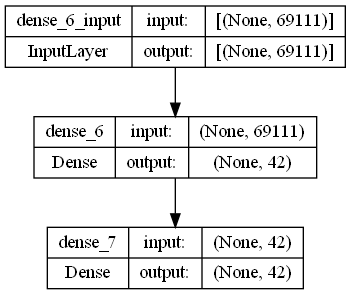

In [74]:
ann_model = build_ann_model()
plot_model(ann_model,show_shapes=True)

In [75]:
ann_history = ann_model.fit(x_train,y_train,epochs=2,batch_size=256,validation_data = [x_test,y_test])
# ypred = ann_model.predict(x_test)

Epoch 1/2


C:\Users\ALI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 42), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


737/737 [==============================] - 24s 32ms/step - loss: 1.8823 - accuracy: 0.5168 - val_loss: 1.4703 - val_accuracy: 0.5958
Epoch 2/2
737/737 [==============================] - 25s 33ms/step - loss: 1.0662 - accuracy: 0.6925 - val_loss: 1.4853 - val_accuracy: 0.5939


In [76]:
y_pred_test = ann_model.predict(x_test)
y_pred_train = ann_model.predict(x_train)

5893/5893 [==============================] - 5s 907us/step


In [77]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_test = cont_to_bin(y_pred_test)
y_pred_train = cont_to_bin(y_pred_train)


score_f1_test = f1_score(y_test, y_pred_test,average = 'weighted')
score_f1_train = f1_score(y_train, y_pred_train,average = 'weighted')

score_f1_test_micro = f1_score(y_test, y_pred_test,average = 'micro')
score_f1_train_micro = f1_score(y_train, y_pred_train,average = 'micro')


print("Training Evaluation")
print("Weighted F1-Score: ", score_f1_train)
print("Micro F1-Score: ", score_f1_train_micro)


print('-' * 20)

print("Weighted F1-Score: ", score_f1_test)
print("Micro F1-Score: ", score_f1_test_micro)


Training Evaluation
Weighted F1-Score:  0.8149826238556495
Micro F1-Score:  0.8177161220528811
--------------------
Weighted F1-Score:  0.5825134670801617
Micro F1-Score:  0.5938529088913282


### Deepth change

In [79]:
def build_ann_model_2():
    model = Sequential()
    
    model.add(Dense(units=228,activation="relu", input_dim=x_train.shape[1]))
    model.add(Dense(units=100,activation="relu"))
    
    model.add(Dense(units=y_test.shape[1], activation="softmax"))
    
    optimizer = Adam(learning_rate=0.004)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

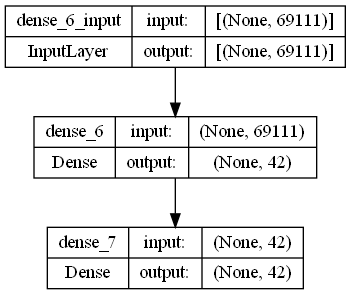

In [80]:
ann_model_2 = build_ann_model_2()
plot_model(ann_model,show_shapes=True)

In [81]:
ann_history_2 = ann_model_2.fit(x_train,y_train,epochs=5,batch_size=128,validation_data = [x_test,y_test])


Epoch 1/5


C:\Users\ALI\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_4/dense_8/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_4/dense_8/embedding_lookup_sparse/Reshape:0", shape=(None, 228), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_4/dense_8/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


1474/1474 [==============================] - 268s 181ms/step - loss: 1.7251 - accuracy: 0.5362 - val_loss: 1.5007 - val_accuracy: 0.5868
Epoch 2/5
1474/1474 [==============================] - 267s 181ms/step - loss: 0.8768 - accuracy: 0.7372 - val_loss: 1.6914 - val_accuracy: 0.5704
Epoch 3/5
   6/1474 [..............................] - ETA: 3:34 - loss: 0.3691 - accuracy: 0.8867

KeyboardInterrupt: 

In [21]:
cont_to_bin(y)

AttributeError: 'list' object has no attribute 'shape'

In [82]:
y_pred_train_2 = ann_model_2.predict(x_train)
y_pred_test_2 = ann_model_2.predict(x_test)

655/655 [==============================] - 1s 1ms/step


In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_test2 = cont_to_bin(y_pred_test)
y_pred_train2 = cont_to_bin(y_pred_train)


score_f1_test2 = f1_score(y_test, y_pred_test2,average = 'weighted')
score_f1_train2 = f1_score(y_train, y_pred_train2,average = 'weighted')

score_f1_test_micro2 = f1_score(y_test, y_pred_test2,average = 'micro')
score_f1_train_micro2 = f1_score(y_train, y_pred_train2,average = 'micro')


print("Training Evaluation")
print("Weighted F1-Score: ", score_f1_train2)
print("Micro F1-Score: ", score_f1_train_micro2)


print('-' * 20)

print("Weighted F1-Score: ", score_f1_test2)
print("Micro F1-Score: ", score_f1_test_micro2)


Training Evaluation
Weighted F1-Score:  0.8149826238556495
Micro F1-Score:  0.8177161220528811
--------------------
Weighted F1-Score:  0.5825134670801617
Micro F1-Score:  0.5938529088913282


In [270]:
ann_model_2.save("model2/ann2")

INFO:tensorflow:Assets written to: model2/ann2\assets


In [272]:
ann_model.save("model1/ann1")

INFO:tensorflow:Assets written to: model1/ann1\assets


In [24]:
from tensorflow.keras.models import load_model
ann_model_2 = load_model("model2/ann2")

In [68]:
def cont_to_bin(_2darr):
    #make an 2d array
    final2d = np.empty(_2darr.shape,dtype = int)
    
    #iterate over each row
    for i in range(0,_2darr.shape[0]):
        #find greatest element
        row = _2darr[i]
        index = row.argmax()
        
        #make an array
        temp = np.zeros( row.size )
        temp[index] = 1
        final2d[i] = temp
        
    return final2d

# bin_classif = cont_to_bin(ypred_2)
# np.apply_along_axis(function, 1, array)
